In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
blue, orange, green, red, *rest = sns.color_palette()

In [11]:
cols=('py_version', 'jf_version', 'implementation', 'function', 'time')
df = pd.concat(
    [pd.read_csv('timedruns-old.csv', names=cols),
    pd.read_csv('timedruns-new.csv', names=cols)]
)
df

,py_version,jf_version,implementation,function,time
0,3.10.7,0.10,c,damerau_levenshtein_distance,4.380978e-07
1,3.10.7,0.10,c,hamming_distance,8.937792e-08
2,3.10.7,0.10,c,jaro_similarity,2.503095e-07
3,3.10.7,0.10,c,jaro_winkler_similarity,1.972026e-07
4,3.10.7,0.10,c,levenshtein_distance,1.547866e-07
5,3.10.7,0.10,c,match_rating_codex,2.190338e-07
6,3.10.7,0.10,c,match_rating_comparison,3.148878e-07
7,3.10.7,0.10,c,metaphone,3.495554e-07
8,3.10.7,0.10,c,nysiis,2.205183e-07
9,3.10.7,0.10,c,soundex,2.679487e-07


<Axes: xlabel='time', ylabel='function'>

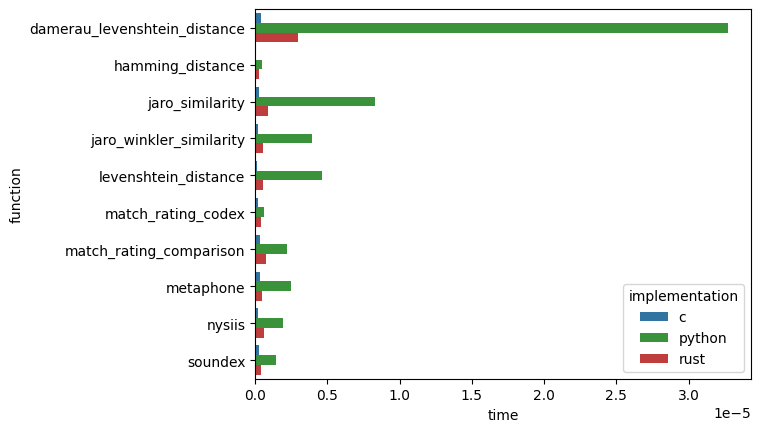

In [12]:
colors = {"python": green, "c" : blue, "rust": red}

sns.barplot(y='function', x='time', hue='implementation', data=df, palette=colors)
# turn the labels 90 degrees

Text(0.5, 0, 'time (log scale)')

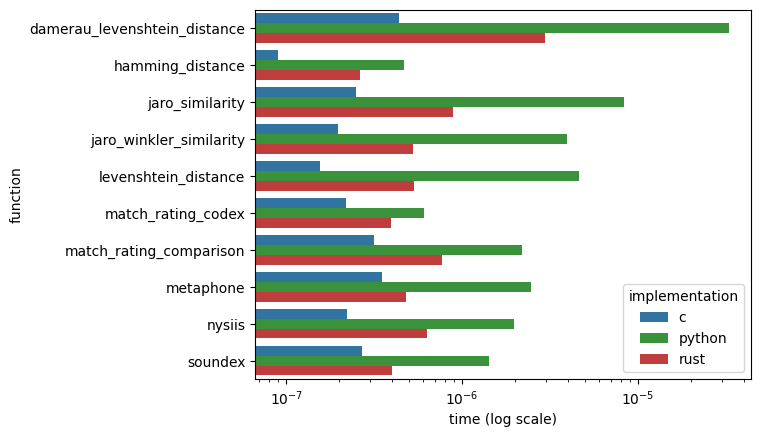

In [13]:
# log scale same plot
sns.barplot(y='function', x='time', hue='implementation', data=df, palette=colors)
plt.xscale('log')
plt.xlabel('time (log scale)')

In [14]:
pivoted = df.pivot_table(index=['function'], columns=['implementation'], values='time')
pivoted['python/c'] = pivoted['python'] / pivoted['c']
pivoted['rust/c'] = pivoted['python'] / pivoted['rust']
pivoted['rust/python'] = pivoted['rust'] / pivoted['python']
pivoted["c"] *= 100000 # multiply by 100000 to get time in microseconds
pivoted["python"] *= 100000
pivoted["rust"] *= 100000
pivoted


implementation,c,python,rust,python/c,rust/c,rust/python
function,,,,,,
damerau_levenshtein_distance,0.043810,3.269755,0.295582,74.635282,11.062088,0.090399
hamming_distance,0.008938,0.046422,0.026380,5.193868,1.759737,0.568267
jaro_similarity,0.025031,0.832981,0.089235,33.278062,9.334707,0.107127
jaro_winkler_similarity,0.019720,0.395773,0.052652,20.069350,7.516778,0.133036
levenshtein_distance,0.015479,0.463462,0.053280,29.942008,8.698668,0.114960
match_rating_codex,0.021903,0.060738,0.039641,2.773012,1.532202,0.652655
match_rating_comparison,0.031489,0.219266,0.076405,6.963312,2.869781,0.348459
metaphone,0.034956,0.246433,0.047915,7.049898,5.143144,0.194434
nysiis,0.022052,0.196083,0.062708,8.891917,3.126920,0.319804


Text(0.5, 0, 'Ratio (X times slower than C) \n (lower is better)')

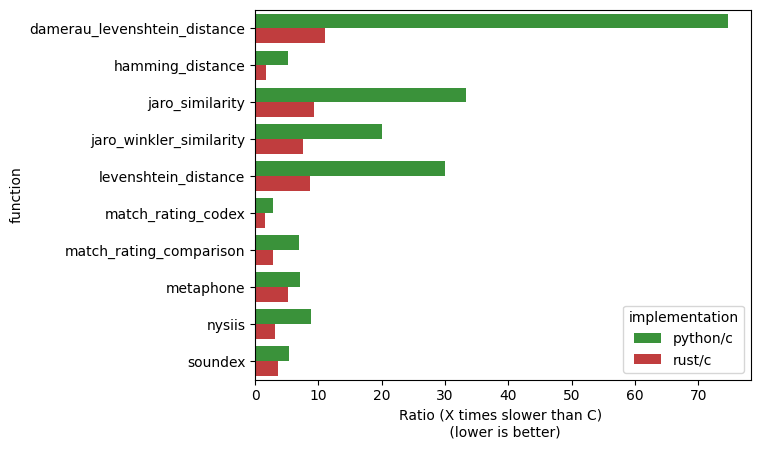

In [15]:
# convert back to long format
df = pivoted.reset_index()
df = pd.melt(df, id_vars=['function'], value_vars=["python/c", "rust/c"])
sns.barplot(x='value', y='function', hue="implementation", data=df, palette=[green, red])
# to add a label to the x axis
plt.xlabel("Ratio (X times slower than C) \n (lower is better)")
#sns.barplot(x='function', y='value', data=df)